In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
ch = pd.read_csv("Churn.csv")
ch.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A10FF33C50>]],
      dtype=object)

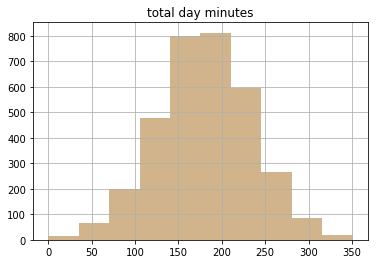

In [9]:
ch.hist(column='total day minutes',bins=10,facecolor='tan')

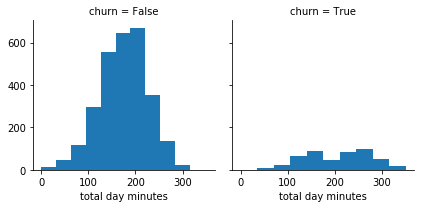

In [10]:
g = sns.FacetGrid(ch,col="churn")
g.map(plt.hist,"total day minutes") # Values are mapped to the function called plt.hist.(function mapped to values)

In [11]:
ch['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [12]:
ch.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

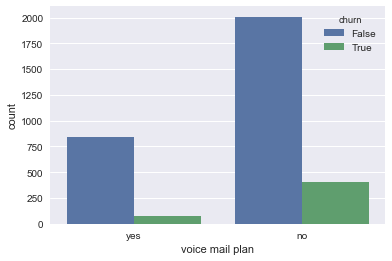

In [15]:
sns.set(style="darkgrid", color_codes=True)
sns.countplot(x='voice mail plan',hue="churn",data=ch)  #hue = column for which you want the colours.`

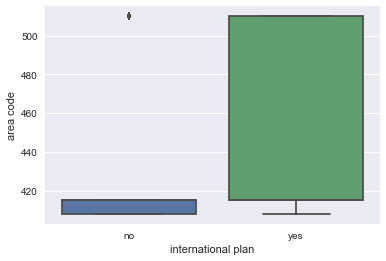

In [17]:
sns.boxplot(x='international plan',y='area code',data = ch)

In [18]:
pd.crosstab(ch['area code'],ch['voice mail plan'])

voice mail plan    no  yes
area code                 
408               618  220
415              1184  471
510               609  231

In [20]:
pd.pivot_table(ch,index=['area code','voice mail plan'],columns= ['international plan'],aggfunc=len)

account length      churn       \
international plan                    no  yes    no  yes   
area code voice mail plan                                  
408       no                         567   51   567   51   
          yes                        200   20   200   20   
415       no                        1082  102  1082  102   
          yes                        423   48   423   48   
510       no                         531   78   531   78   
          yes                        207   24   207   24   

                          customer service calls      number vmail messages  \
international plan                            no  yes                    no   
area code voice mail plan                                                     
408       no                                 567   51                   567   
          yes                                200   20                   200   
415       no                                1082  102                  1082   
          yes                                423   48                   423   
510       no                                 531   78                   531   
          yes                                207   24                   207   

                               phone number       ...   total intl charge  \
international plan         yes           no  yes  ...                  no   
area code voice mail plan                         ...                       
408       no                51          567   51  ...               567.0   
          yes               20          200   20  ...               200.0   
415       no               102         1082  102  ...              1082.0   
          yes               48          423   48  ...               423.0   
510       no                78          531   78  ...               531.0   
          yes               24          207   24  ...               207.0   

                                 total intl minutes        total night calls  \
international plan           yes                 no    yes                no   
area code voice mail plan                                                      
408       no                51.0              567.0   51.0               567   
          yes               20.0              200.0   20.0               200   
415       no               102.0             1082.0  102.0              1082   
          yes               48.0              423.0   48.0               423   
510       no                78.0              531.0   78.0               531   
          yes               24.0              207.0   24.0               207   

                               total night charge        total night minutes  \
international plan         yes                 no    yes                  no   
area code voice mail plan                                                      
408       no                51              567.0   51.0               567.0   
          yes               20              200.0   20.0               200.0   
415       no               102             1082.0  102.0              1082.0   
          yes               48              423.0   48.0               423.0   
510       no                78              531.0   78.0               531.0   
          yes               24              207.0   24.0               207.0   

                                  
international plan           yes  
area code voice mail plan         
408       no                51.0  
          yes               20.0  
415       no               102.0  
          yes               48.0  
510       no                78.0  
          yes               24.0  

[6 rows x 36 columns]

In [21]:
pd.pivot_table(ch,'total intl minutes',index = ['area code','voice mail plan'],columns = ['international plan'])

international plan                no        yes
area code voice mail plan                      
408       no               10.087302  10.821569
          yes              10.000500  10.720000
415       no               10.287061  10.605882
          yes              10.327896  11.193750
510       no               10.189642  10.167949
          yes               9.943961  10.600000

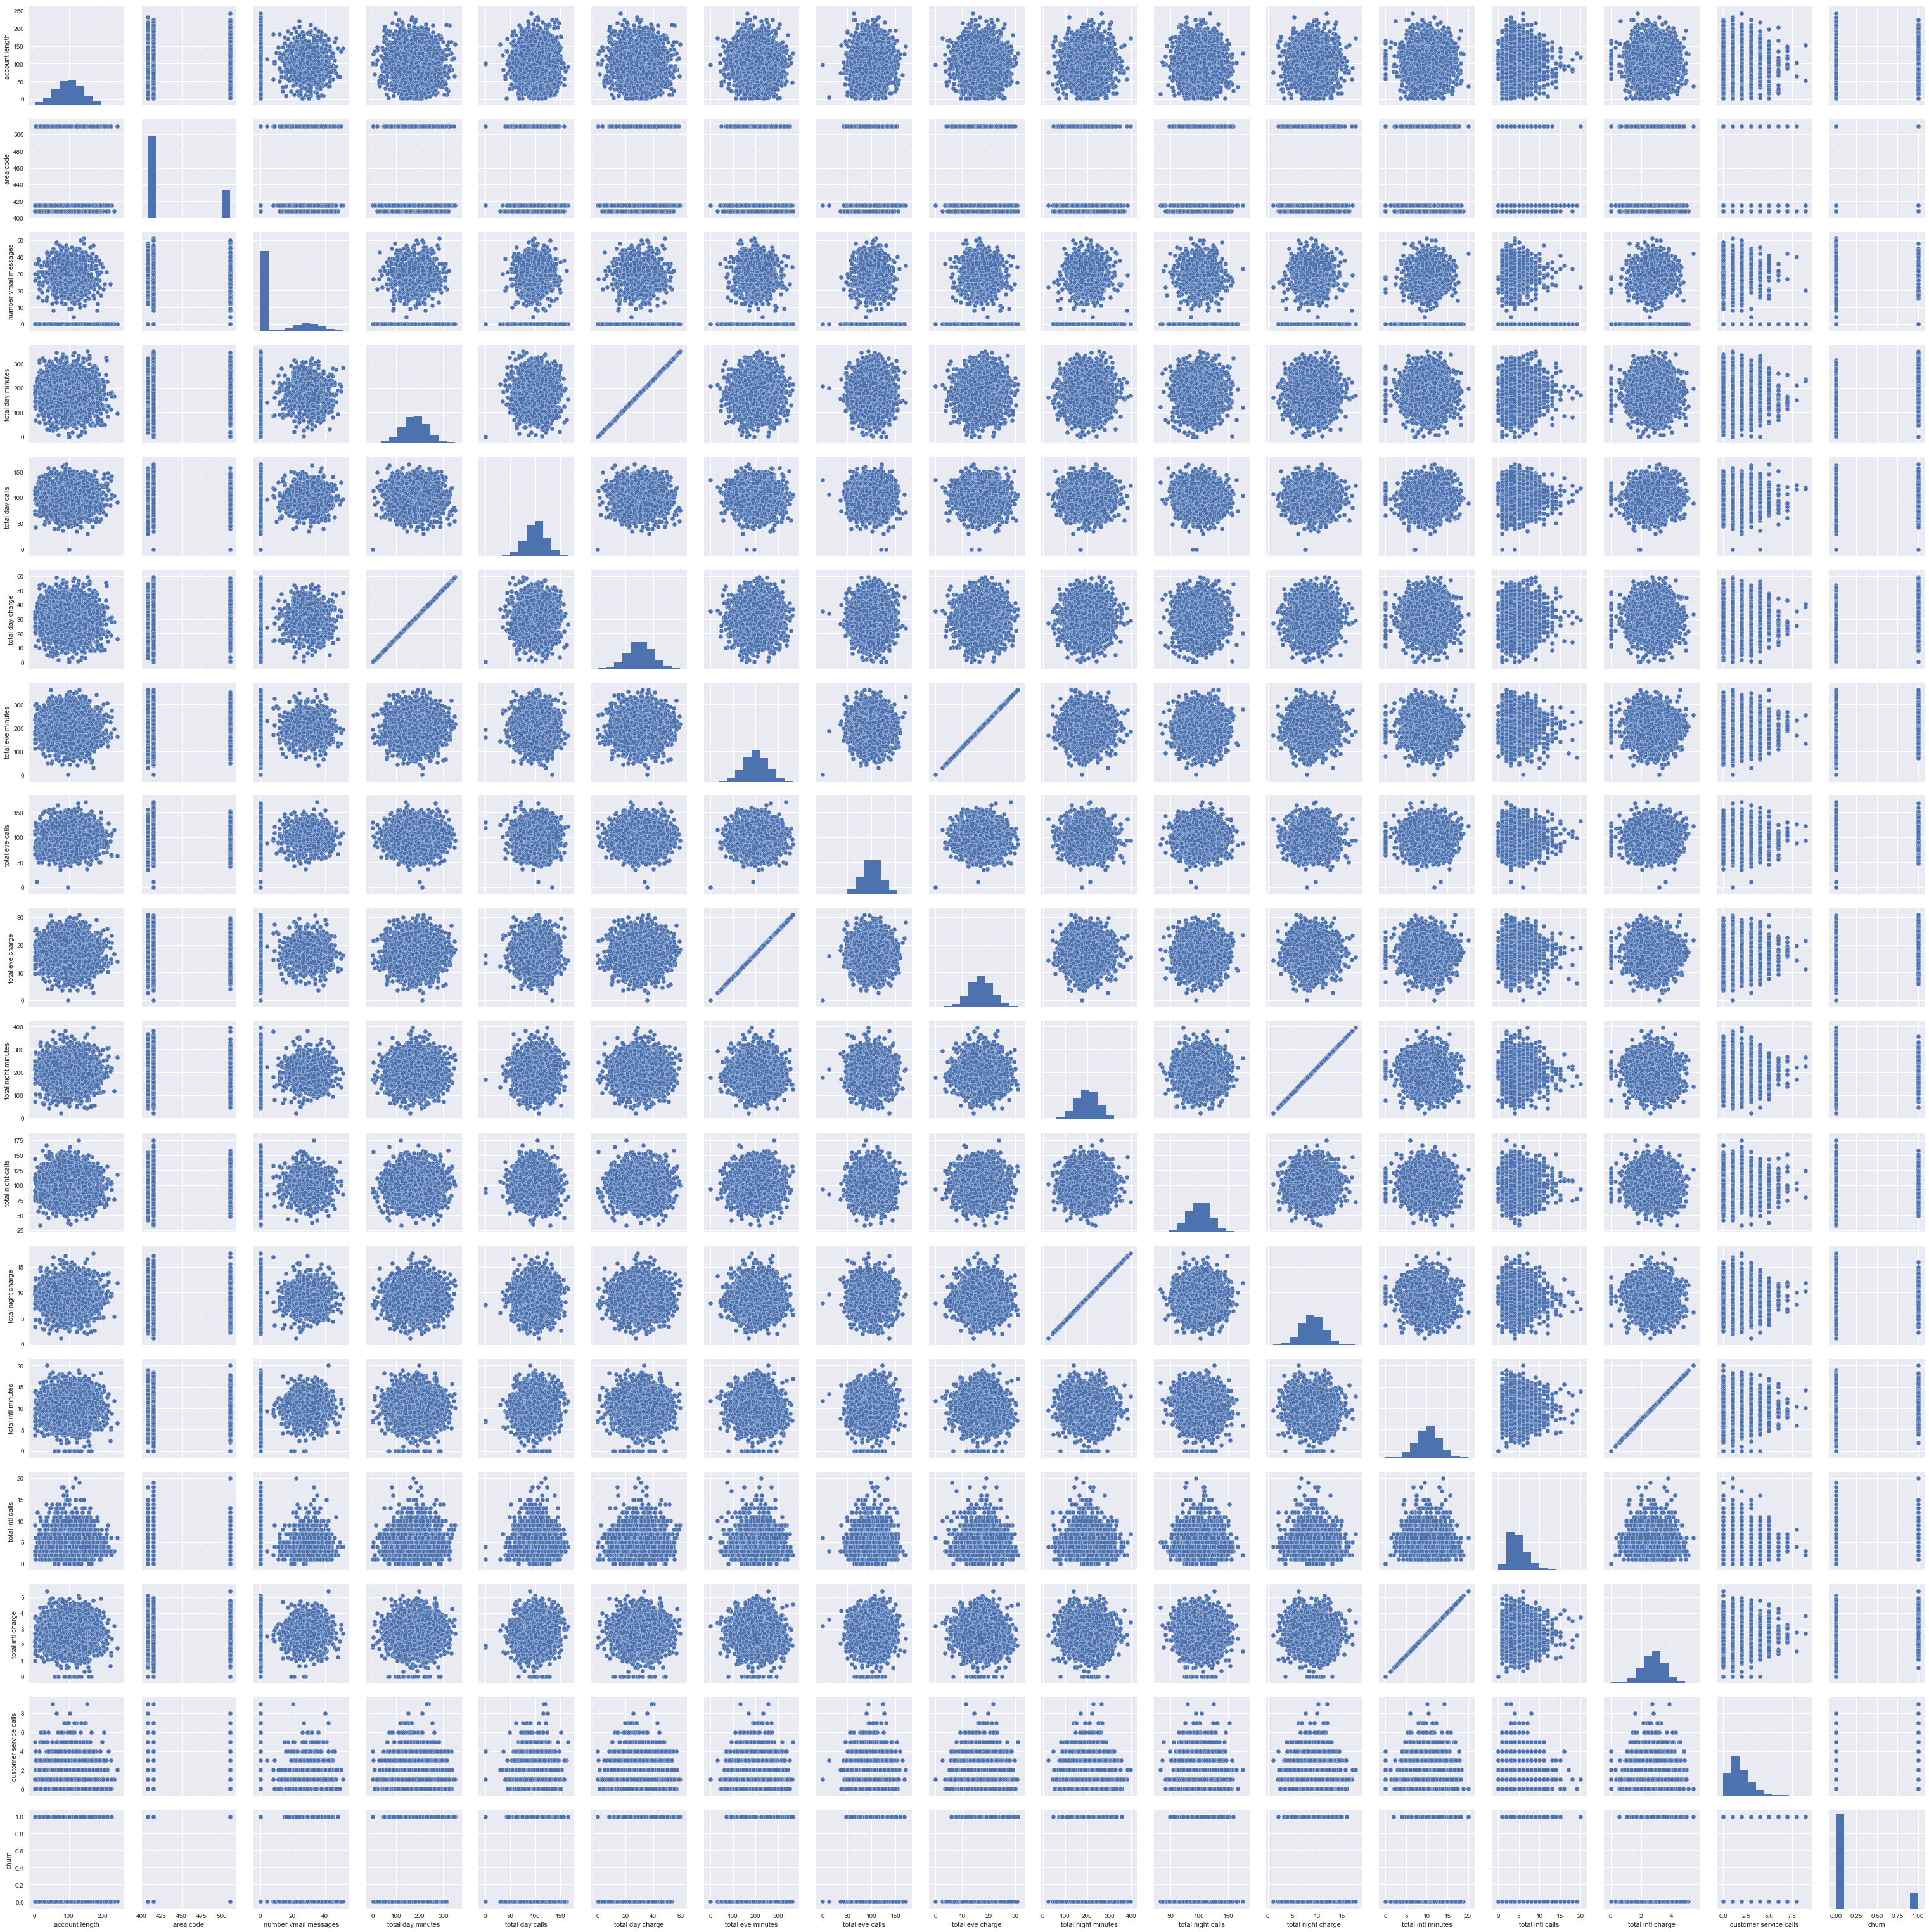

In [24]:
sns.pairplot(ch) #if data is scttered then there is no correlation.

In [27]:
ch['total night calls'].std()

19.568609346058615

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


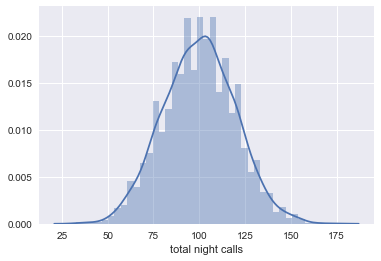

In [28]:
sns.distplot(ch['total night calls'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A143780D68>,
      dtype=object)

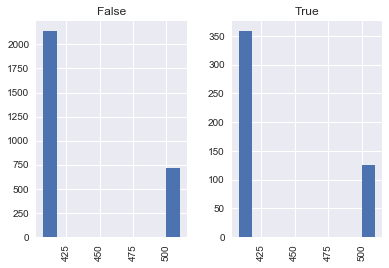

In [29]:
ch.hist(by='churn',column='area code') # by=grouping 